In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#Importing python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Importing dataset

titanic_df_train = pd.read_csv('train_1.csv')
titanic_df_test = pd.read_csv('test_1.csv')

In [3]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
titanic_df_train[titanic_df_train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
titanic_df_train.groupby(["Survived"]).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [7]:
# Replace the numbers in categorical variables with the actual class in the pclass co['origin'] 
titanic_df_train['Pclass'] = titanic_df_train['Pclass'].replace({1: 'Upper', 2: 'Middle', 3: 'Lower'})

In [8]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
cat_dtype = titanic_df_train.select_dtypes(include=['object']).columns
print(cat_dtype)

Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [10]:
titanic_df_train.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,Lower,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
titanic_df_train.median()

PassengerId    446.0000
Survived         0.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

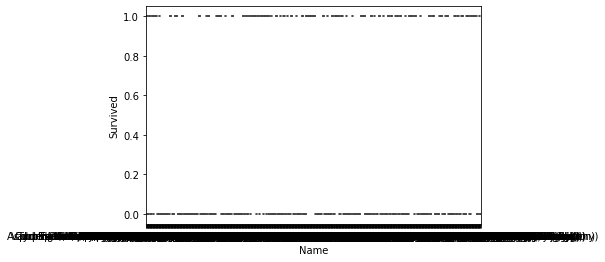

In [12]:
sns.boxplot(x='Name', y='Survived', data=titanic_df_train)

In [13]:
titanic_df_train = titanic_df_train.drop('Name', axis=1)

In [14]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Upper,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Lower,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Upper,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Lower,male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_df_train[~titanic_df_train.applymap(np.isreal).all(1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Upper,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Lower,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Upper,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Lower,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Middle,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,Upper,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,Lower,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,Upper,male,26.0,0,0,111369,30.0000,C148,C


In [16]:
#Handling missing data

titanic_df_train['Cabin'] = titanic_df_train['Cabin'].fillna('None')

In [17]:
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [18]:
titanic_df_train['Age'] = titanic_df_train['Age'].fillna(titanic_df_train['Age'].median())

In [19]:
titanic_df_train['Embarked'] = titanic_df_train['Embarked'].fillna(titanic_df_train['Embarked'].mode()[0])

In [20]:
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


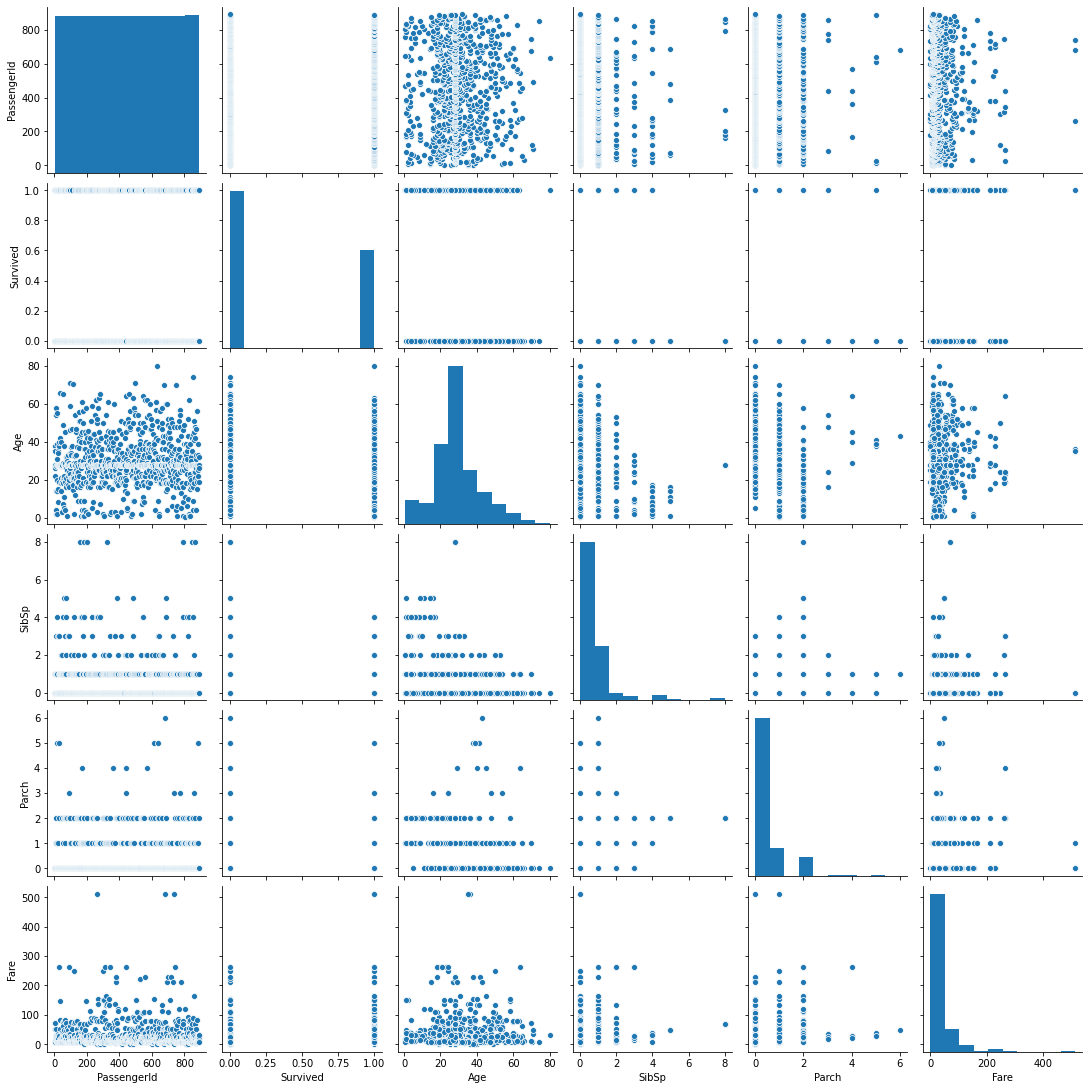

In [21]:
sns.pairplot(titanic_df_train)

In [25]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,Upper,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Lower,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,Upper,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Lower,male,35.0,0,0,373450,8.0500,None,S


In [28]:
titanic_df_train['Embarked'] = titanic_df_train['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})

In [29]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,male,22.0,1,0,A/5 21171,7.2500,None,Southampton
1,2,1,Upper,female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Lower,female,26.0,0,0,STON/O2. 3101282,7.9250,None,Southampton
3,4,1,Upper,female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Lower,male,35.0,0,0,373450,8.0500,None,Southampton


In [31]:
titanic_df_train = titanic_df_train.drop('Ticket',axis=1)

In [32]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Lower,male,22.0,1,0,7.2500,None,Southampton
1,2,1,Upper,female,38.0,1,0,71.2833,C85,Cherbourg
2,3,1,Lower,female,26.0,0,0,7.9250,None,Southampton
3,4,1,Upper,female,35.0,1,0,53.1000,C123,Southampton
4,5,0,Lower,male,35.0,0,0,8.0500,None,Southampton


In [33]:
titanic_df_train.drop('Cabin',axis=1,inplace=True)

In [34]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,Lower,male,22.0,1,0,7.2500,Southampton
1,2,1,Upper,female,38.0,1,0,71.2833,Cherbourg
2,3,1,Lower,female,26.0,0,0,7.9250,Southampton
3,4,1,Upper,female,35.0,1,0,53.1000,Southampton
4,5,0,Lower,male,35.0,0,0,8.0500,Southampton


In [35]:
titanic_df_train = pd.get_dummies(titanic_df_train, columns=['Pclass','Sex','Embarked'])

In [36]:
titanic_df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,1,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1


In [38]:
titanic_df_train.shape

(891, 14)

In [39]:
X = titanic_df_train.drop('Survived',axis=1)
y = titanic_df_train['Survived']

In [40]:
X.head(10)

,PassengerId,Age,SibSp,Parch,Fare,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,1,22.0,1,0,7.2500,1,0,0,0,1,0,0,1
1,2,38.0,1,0,71.2833,0,0,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,1
3,4,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,5,35.0,0,0,8.0500,1,0,0,0,1,0,0,1
5,6,28.0,0,0,8.4583,1,0,0,0,1,0,1,0
6,7,54.0,0,0,51.8625,0,0,1,0,1,0,0,1
7,8,2.0,3,1,21.0750,1,0,0,0,1,0,0,1
8,9,27.0,0,2,11.1333,1,0,0,1,0,0,0,1
9,10,14.0,1,0,30.0708,0,1,0,1,0,1,0,0


In [41]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [43]:
X_train.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
114,115,17.0,0,0,14.4583,1,0,0,1,0,1,0,0
874,875,28.0,1,0,24.0000,0,1,0,1,0,1,0,0
76,77,28.0,0,0,7.8958,1,0,0,0,1,0,0,1
876,877,20.0,0,0,9.8458,1,0,0,0,1,0,0,1
674,675,28.0,0,0,0.0000,0,1,0,0,1,0,0,1


In [44]:
X_train.shape

(623, 13)

In [45]:
X_test.shape

(268, 13)

In [46]:
y_train.shape

(623,)

In [47]:
y_test.shape

(268,)

In [48]:
logit_model = LogisticRegression()

In [49]:
logit_model.fit(X_train,y_train)

C:\Users\Alkesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = logit_model.predict(X_test)

In [51]:
logit_model.coef_

array([[ 6.68008415e-04, -3.93294892e-02, -3.49522266e-01,
         6.64932461e-02,  7.30584454e-04, -9.99791578e-01,
         4.20208965e-01,  1.11174629e+00,  1.66153206e+00,
        -1.12936837e+00,  4.26718024e-01,  1.75639287e-01,
        -7.01936293e-02]])

In [52]:
logit_model.intercept_

array([0.54235408])

In [53]:
model_score = logit_model.score(X_test, y_test)

In [54]:
print(model_score)

0.7686567164179104


In [55]:
print(metrics.confusion_matrix(y_test, y_pred))

[[130  23]
 [ 39  76]]


In [56]:
y_score = logit_model.decision_function(X_test)

In [57]:
print(y_score)

[ 1.95305805 -2.60282277  1.949752    0.739367    2.78881189 -2.06034337
 -1.42101038  1.56085048 -0.41588494  0.10196797 -2.1034015   0.11912811
 -1.62668806 -1.31670291  0.53066528 -0.33937869 -2.3977245  -2.44166884
 -2.94017097  1.41671508 -2.65390606 -2.4721842   3.30956369 -0.63338056
  0.79638967 -2.16346411  3.03839049  1.49005581 -0.83772933  2.96452808
  0.86618693 -0.42466999  0.01399698  0.29457745 -2.64697645 -0.1486039
 -0.59942969 -2.6493415  -0.09297351 -2.00965774  0.22275242  0.2191371
  1.7348224  -1.09235294  0.93371535 -2.78522595 -3.62990381 -1.22961675
  0.44220786 -0.29613657 -0.70874018  1.77372981 -0.81693411 -1.4674992
 -2.73583745 -0.05242412 -1.20755697 -1.50277413 -3.17570447  0.62418324
 -2.45879473 -1.68154477 -0.68048298 -1.17030605 -0.43377997  0.80539238
 -1.80203677 -2.02998297  1.26698867 -1.98159553 -2.9042154  -3.05129132
 -0.27211755 -2.25813043  0.83616222 -0.66886492  1.81389003 -1.9783356
 -0.98197389  3.01670677 -2.29760698 -5.26372334 -2.441

In [59]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.8166328423852404


In [60]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [61]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.7574626865671642
[[131  22]
 [ 43  72]]
